In [1]:
%matplotlib inline


Plot concessions  in Nigeria
--------------------------------

This example shows how you can add a background basemap to plots created
with the geopandas ``.plot()`` method. This makes use of the
`contextily <https://github.com/darribas/contextily>`__ package to retrieve
web map tiles from several sources (OpenStreetMap, Stamen).

https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html

https://raw.githubusercontent.com/OpenOil-UG/concessionsmap/master/concessions/data/NG_contracts%2B.geojson


In [17]:
# sphinx_gallery_thumbnail_number = 3
import geopandas

import contextily as ctx

import pandas as pd

from shapely.geometry import Point, Polygon

## Load data

### Nigerian states

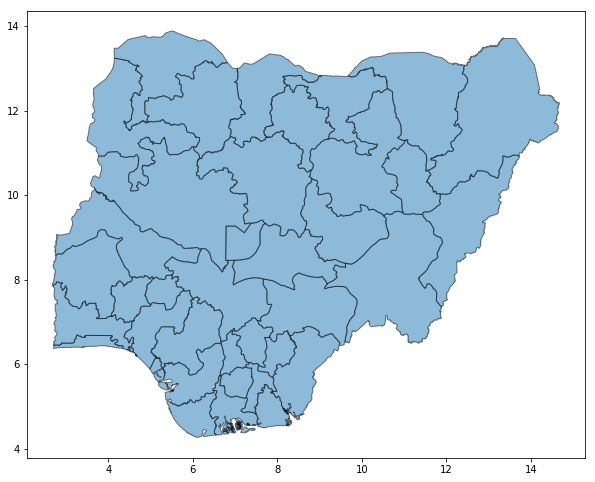

In [3]:
df_states = geopandas.read_file(geopandas.datasets.get_path('nybb'))
df_states = geopandas.read_file('/Users/knuttungland/src/Nigeria/data/Nigeriabound97.shp')
ax = df_states.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

### Nigerian concessions

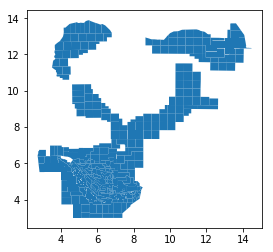

In [4]:
# concesstions
df_concessions = geopandas.read_file('/Users/knuttungland/src/Nigeria/data/NG_contracts.geojson')

df_concessions.plot()

Convert the data to Web Mercator
================================

Web map tiles are typically provided in
`Web Mercator <https://en.wikipedia.org/wiki/Web_Mercator>`__
(`EPSG 3857 <https://epsg.io/3857>`__), so we need to make sure to convert
our data first to the same CRS to combine our polygons and background tiles
in the same map:



In [5]:
df_states = df_states.to_crs(epsg=3857)
df_concessions = df_concessions.to_crs(epsg=3857)

Contextily helper function
==========================

We define a small helper function that uses
`contextily <https://github.com/darribas/contextily>`__ to add a map
as background to an existing plot: 



In [7]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

find the min and max for the map and
 add background

231196.99026780238 1700746.7611969553 272761.7223384773 1622449.6017350608


(231196.99026780238, 1700746.7611969553, 272761.7223384773, 1622449.6017350608)

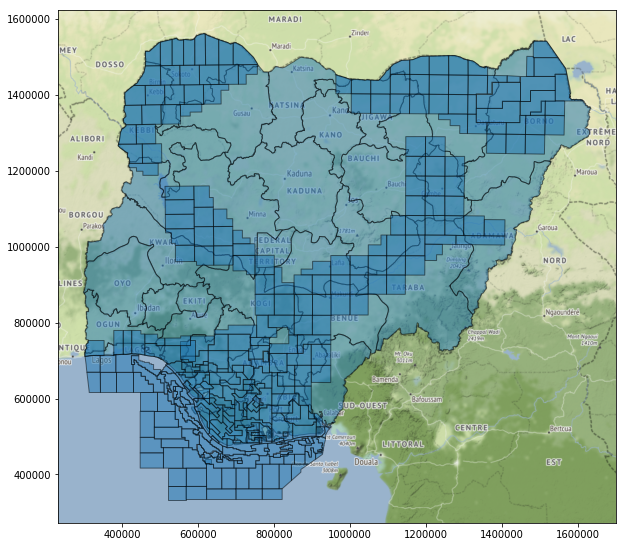

In [34]:

ax = df_states.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax = df_concessions.plot(ax=ax, figsize=(10, 10), alpha=0.5, edgecolor='k')

xmin, xmax, ymin, ymax = ax.axis()
print(xmin, xmax, ymin, ymax)

url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'
zoom = 7
basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
ax.imshow(basemap, extent=extent, interpolation='bilinear')
ax.axis((xmin, xmax, ymin, ymax))

Only the oil states 
============================





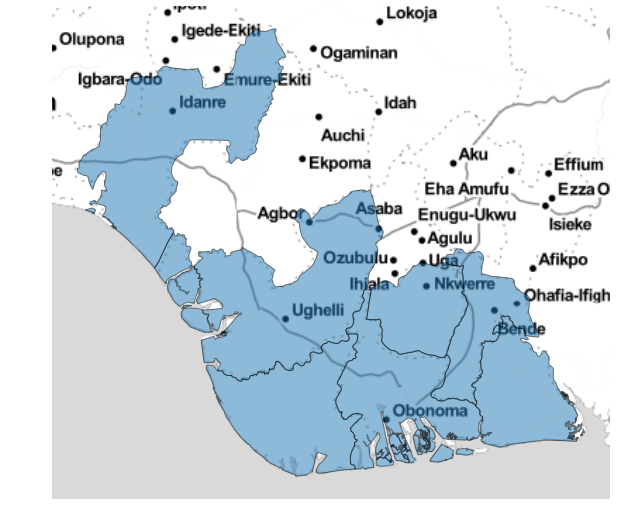

In [44]:
oil_states= ['Akwa Ibom','Delta','Rivers','Bayelsa','Ondo','Edo State','Imo','Abia','Federal Capital Territory','Lagos']
oil_states= ['Akwa Ibom','Delta','Rivers','Bayelsa','Ondo','Edo State','Imo','Abia']

df_oil_states_map = df_states[df_states['name'].isin(oil_states)]

ax = df_oil_states_map.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=7, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()

By default, contextily uses the Stamen Terrain style. We can specify a
different style using ``ctx.sources``:



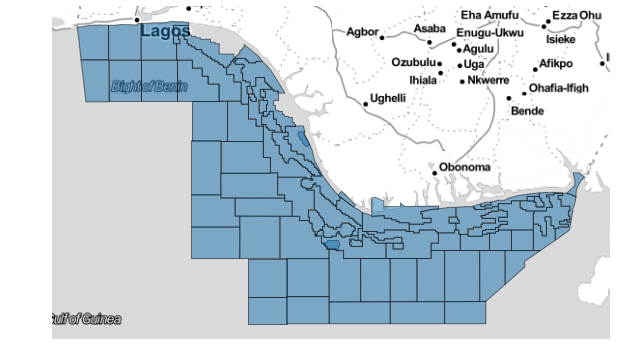

In [45]:
concessions_statoil= ['OML 128','OML 129']
df_concessions_statoil = df_concessions[df_concessions['Type'].isin(['Offshore'])]

ax = df_concessions_statoil.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=7, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()

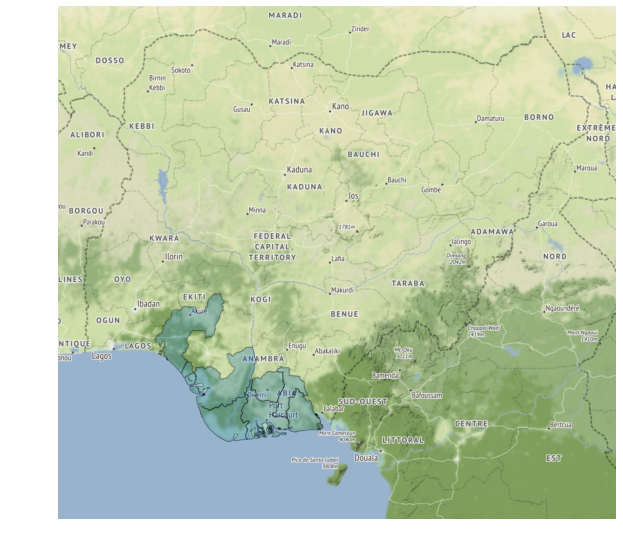

In [51]:
ax = df_oil_states_map.plot(figsize=(10, 10), alpha=0.3, edgecolor='k')


url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'
zoom = 7
basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
ax.imshow(basemap, extent=extent, interpolation='bilinear')
ax.axis((xmin, xmax, ymin, ymax))
ax.set_axis_off()

In [55]:
cities = [[4.324, 6.067, 'Akassa'], [9.05785, 7.49508, 'Ajuba'], [6.453, 3.396, 'Lagos']] 
cities = [[4.324, 6.067, 'Akassa']] 
  
# Create the pandas DataFrame 
df_cities_raw = pd.DataFrame(cities, columns = ['Latitude', 'Longitude','Name'])

df_cities_geometry = [Point(xy) for xy in zip(df_cities_raw['Longitude'],df_cities_raw['Latitude'])]
 
# in wgs84
df_cities = geopandas.GeoDataFrame(df_cities_raw, crs={'init':'epsg:4326'} ,geometry=df_cities_geometry)

df_cities = df_cities.to_crs(epsg=3857)


In [56]:
df_cities

,Latitude,Longitude,Name,geometry
0,4.324,6.067,Akassa,POINT (675375.3506427907 481803.0409893104)


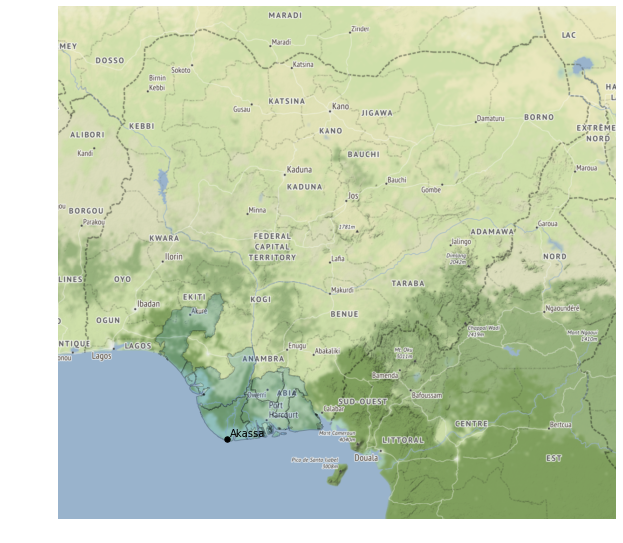

In [57]:
ax = df_oil_states_map.plot(figsize=(10, 10), alpha=0.2, edgecolor='k')

url=ctx.sources.ST_TERRAIN
zoom = 7
basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)

df_cities.plot(ax=ax,markersize=29,color='black')
for x,y,label in zip(df_cities.geometry.x,df_cities.geometry.y,df_cities.Name):
    ax.annotate(label,xy=(x,y),xytext=(3,3),textcoords='offset points')
ax.imshow(basemap, extent=extent, interpolation='bilinear')
ax.axis((xmin, xmax, ymin, ymax))
ax.set_axis_off()

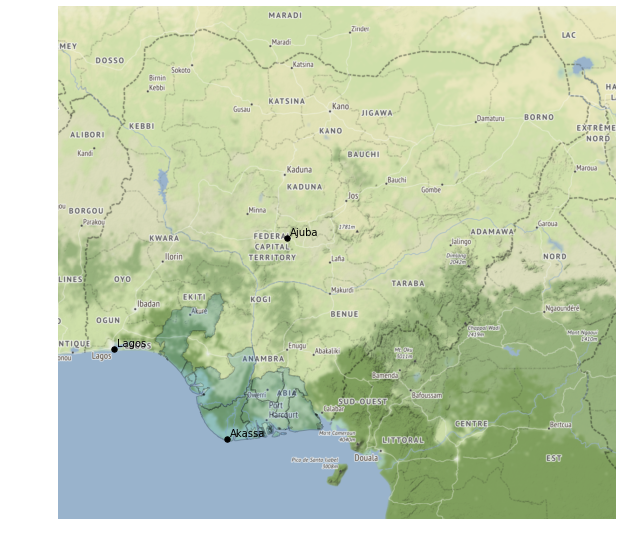

In [54]:
ax = df_oil_states_map.plot(figsize=(10, 10), alpha=0.2, edgecolor='k')

url=ctx.sources.ST_TERRAIN
zoom = 7
basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)

df_cities.plot(ax=ax,markersize=29,color='black')
for x,y,label in zip(df_cities.geometry.x,df_cities.geometry.y,df_cities.Name):
    ax.annotate(label,xy=(x,y),xytext=(3,3),textcoords='offset points')
ax.imshow(basemap, extent=extent, interpolation='bilinear')
ax.axis((xmin, xmax, ymin, ymax))
ax.set_axis_off()

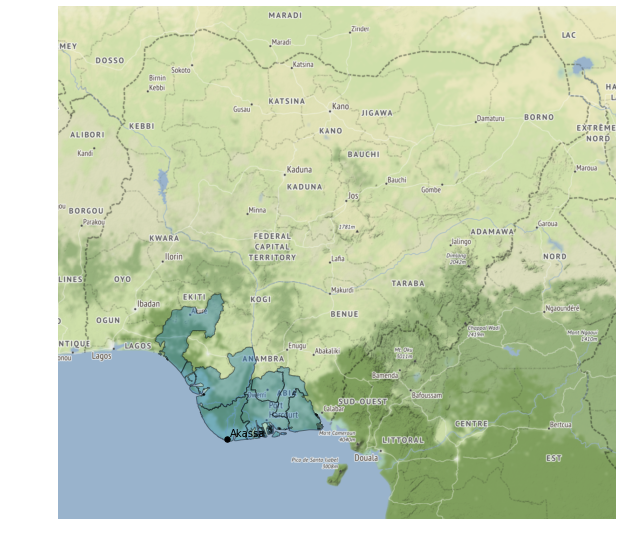

In [59]:
ax = df_oil_states_map.plot(figsize=(10, 10), alpha=0.4, edgecolor='k')

url=ctx.sources.ST_TERRAIN
zoom = 7
basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)

df_cities.plot(ax=ax,markersize=29,color='black')
for x,y,label in zip(df_cities.geometry.x,df_cities.geometry.y,df_cities.Name):
    ax.annotate(label,xy=(x,y),xytext=(3,3),textcoords='offset points')
ax.imshow(basemap, extent=extent, interpolation='bilinear')
ax.axis((xmin, xmax, ymin, ymax))
ax.set_axis_off()